In [68]:
import cv2
import matplotlib.pyplot as plt
from src.utils import download_dataset_from_dropbox

In [69]:
download_dataset_from_dropbox(
    url=r"https://www.dropbox.com/s/1eb7fx9bqr85cfo/data_set_VU_test1.zip?raw=1")

Dataset already exists


In [70]:
import os

folder_path = 'data/dataset/images'  # Replace 'data' with the actual folder path

file_count = len(os.listdir(folder_path))

print(f"Number of files in the folder: {file_count}")


Number of files in the folder: 8091


In [71]:
import cv2
import matplotlib.pyplot as plt
import os

resolutions = []

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            resolutions.append((width, height))

widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]




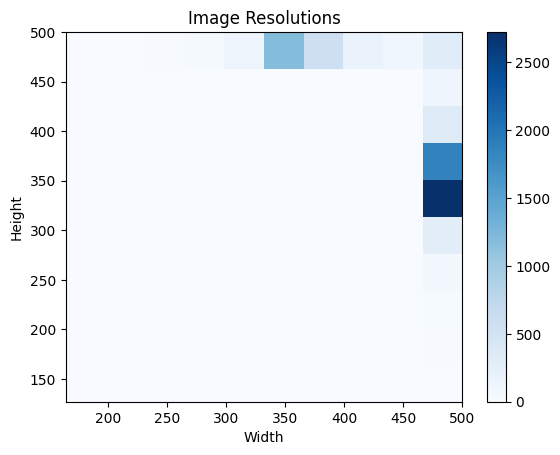

In [72]:
plt.hist2d(widths, heights, bins=10, cmap='Blues')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Resolutions')
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Image Resolutions')

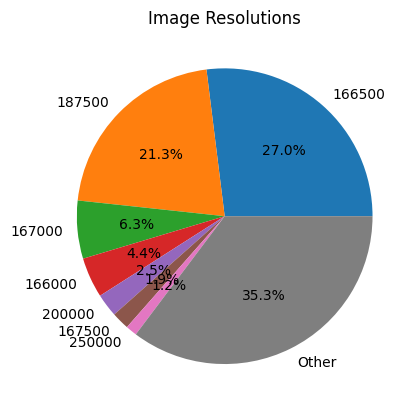

In [73]:

resolution_counts = {}
pixel_counts = {}
for res in resolutions:
    width, height = res
    pixels = width * height
    if pixels in pixel_counts:
        pixel_counts[pixels] += 1
    else: 
        pixel_counts[pixels] = 1

# Extract the resolutions and their counts
unique_resolutions = list(pixel_counts.keys())
unique_resolutions_counts = list(pixel_counts.values())

resolutions_counts_sorted = sorted(zip(unique_resolutions, unique_resolutions_counts), key=lambda x: x[1], reverse=True)
resolutions_sorted, counts_sorted = zip(*resolutions_counts_sorted)
resolutions_counts_sorted_blobed = list(resolutions_counts_sorted[:7]) + [('Other', sum(counts_sorted[7:]))]
resolutions_sorted_blobed, counts_sorted_blobed = zip(*resolutions_counts_sorted_blobed)

# Create the pie chart
plt.pie(counts_sorted_blobed, labels=resolutions_sorted_blobed, autopct='%1.1f%%')
plt.title('Image pixel distribution')


In [76]:
import statistics

min_value = min(pixel_counts.keys())
max_value = max(pixel_counts.keys())

print("Minimum pixels:", min_value)
print("Maximum pixels:", max_value)


pixels = []
for res in resolutions:
    width, height = res
    pixels.append(width * height)


median_pixels = statistics.median(pixels)
print("Median of pixels:", median_pixels)

mean_pixels = statistics.mean(pixels)
print("Mean of pixels:", mean_pixels)

std_dev = statistics.stdev(pixels)
print("Standard Deviation of pixels:", std_dev)




Minimum pixels: 55008
Maximum pixels: 250000
Standard Deviation of pixels: 22276.920960049752
Median of pixels: 167500
Mean of pixels: 177720.3894450624
